In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import control as ctrl
from scipy.signal import butter, filtfilt, bilinear

print("Setup Complete")

Setup Complete


In [126]:
ppg_filepath = "../golden_data/ppg_golden_data.csv"

ppg_data = pd.read_csv(ppg_filepath, nrows=100000)

In [127]:
# b_s = [0, 0, 0, 0, 14641] 
# a_s = [1, 28.74438523, 413.1198405, 3478.070613, 14641]

# system_s = ctrl.TransferFunction(b_s, a_s)
# system_z = ctrl.sample_system(system_s, 1/100, method='tustin')
# b_z, a_z = system_z.num[0][0], system_z.den[0][0]

# print(a_z)
# print(b_z)

In [128]:

# Hàm lọc tín hiệu sử dụng các hệ số z-domain
def apply_filter(data, b, a):
    data = np.asarray(data, dtype=np.float64)  # Đảm bảo dữ liệu đầu vào là kiểu float64
    y = np.zeros_like(data, dtype=np.float64)  # Tạo mảng kết quả kiểu float64
    for i in range(len(data)):
        y[i] = b[0] * data[i]
        for j in range(1, len(b)):
            if i-j >= 0:
                y[i] += b[j] * data[i-j]
        for j in range(1, len(a)):
            if i-j >= 0:
                y[i] -= a[j] * y[i-j]
    return y


In [129]:
# Định nghĩa các tham số bộ lọc LPF
fs = 100.0  # Tần số lấy mẫu
ws = 10
wp = 5
order = 4  # Bậc của bộ lọc ở miền s

b_z_low = [0,	3.44412083898154e-07,	3.68270826726737e-06,	3.58022964878886e-06,	3.16452689807573e-07]
a_z_low = [1,	-3.85891960196546,	5.58662548842554,	-3.59609278768443,	0.868394825027037]

# Áp dụng bộ lọc
filtered_sig = apply_filter(ppg_data, b_z_low, a_z_low)

b_z_hi = []
a_z_hi = []

# Áp dụng bộ lọc
filtered_sig1 = apply_filter(filtered_sig, b_z_hi, a_z_hi)


In [134]:

# # Thông số bộ lọc
# fs = 100.0  # Tần số lấy mẫu (Hz)
# lowcut = 0.01  # Tần số thấp của dải thông (Hz)
# highcut = 4.0  # Tần số cao của dải thông (Hz)
# order = 3  # Bậc của bộ lọc

# # Hàm thiết kế bộ lọc bandpass Butterworth
# def butter_bandpass(lowcut, highcut, fs, order=4):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# # Hàm chuyển đổi từ miền s sang miền z
# def s_to_z(a_s, b_s, fs):
#     # Chuyển đổi hệ số từ miền s sang miền z
#     b_z, a_z = bilinear(b_s, a_s, fs)
#     return b_z, a_z

# # Thiết kế bộ lọc
# b_s, a_s = butter_bandpass(lowcut, highcut, fs, order)

# # Chuyển đổi hệ số từ miền s sang miền z
# b_z, a_z = s_to_z(b_s, a_s, fs)

# print("Hệ số b_z:", b_z)
# print("Hệ số a_z:", a_z)


Hệ số b_z: [   625.19038325  -3785.68156935   9551.34802819 -12852.39387936
   9728.05348158  -3927.05189085    660.53544654]
Hệ số a_z: [  1.          -6.00030001  15.00120006 -20.00180011  15.00120006
  -6.00030001   1.        ]


[  1.          -5.49941925  12.61514189 -15.45376986  10.66466656
  -3.93149481   0.60487548]
[ 0.00155615  0.         -0.00466845  0.          0.00466845  0.
 -0.00155615]


<Axes: >

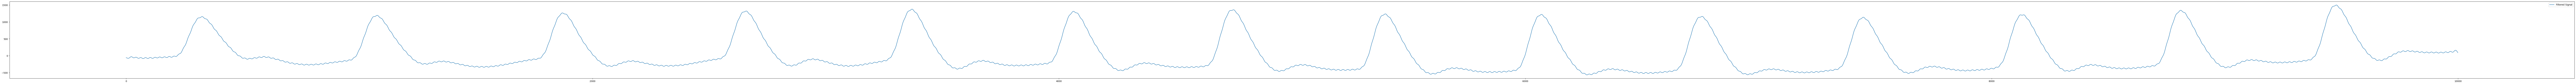

In [141]:
# # Đọc dữ liệu từ file CSV
# file_path = '../golden_data/ppg_golden_data.csv'
# data = pd.read_csv(file_path, nrows=10000)

# # Giả sử tín hiệu nằm trong cột đầu tiên của file CSV
# signal = data.iloc[:, 0].values

# # Các thông số của bộ lọc
# fs = 100.0  # Tần số lấy mẫu (Hz)
# lowcut = 0.01  # Tần số thấp của dải thông (Hz)
# highcut = 4  # Tần số cao của dải thông (Hz)
# order = 3  # Bậc của bộ lọc

# # Hàm thiết kế bộ lọc bandpass Butterworth
# def butter_bandpass(lowcut, highcut, fs, order=4):
#     nyq = 0.5 * fs
#     low = lowcut / nyq
#     high = highcut / nyq
#     b, a = butter(order, [low, high], btype='band')
#     return b, a

# # Hàm áp dụng bộ lọc lên tín hiệu
# def apply_filter(data, lowcut, highcut, fs, order=4):
#     b, a = butter_bandpass(lowcut, highcut, fs, order=order)
#     print(a)
#     print(b)
#     y = filtfilt(b, a, data)
#     return y

# # Áp dụng bộ lọc bandpass lên tín hiệu
# filtered_signal = apply_filter(signal, lowcut, highcut, fs, order)

# # Lưu dữ liệu đã lọc vào một file CSV mới
# filtered_data = pd.DataFrame(filtered_signal, columns=['Filtered Signal'])
# filtered_data.to_csv('../golden_data/ppg_filtered_data.csv', index=False)

# filtered_data.head()

# ppg_data = pd.read_csv('../golden_data/ppg_filtered_data.csv', nrows=10000)
# plt.figure(figsize=(200,6))
# sns.lineplot(data=ppg_data)

In [142]:
print(filtered_sig1)
print(ppg_data)

[[0.00000000e+00]
 [3.37868254e-04]
 [5.25535645e-03]
 ...
 [1.22680683e+08]
 [1.22695789e+08]
 [1.22710897e+08]]
      Filtered Signal
0          -55.655219
1          -58.542154
2          -61.377224
3          -64.158524
4          -66.857256
...               ...
9995       131.934291
9996       122.485265
9997       112.423305
9998       101.976842
9999        91.348983

[10000 rows x 1 columns]


<Axes: >

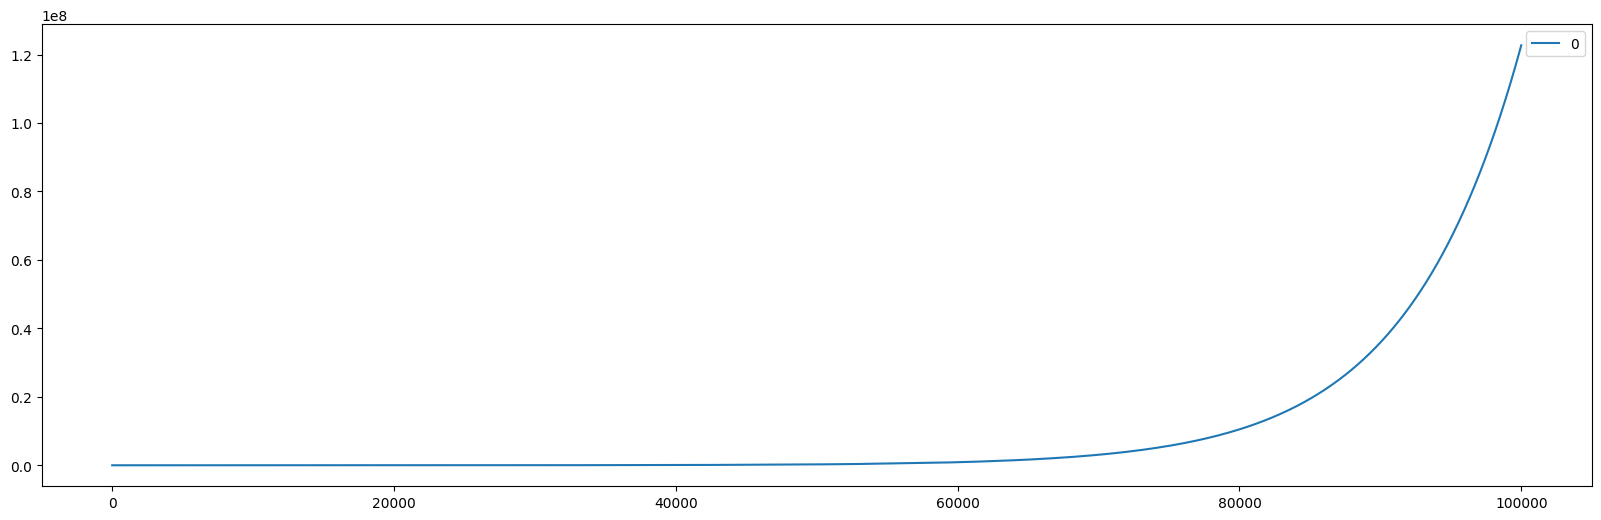

In [143]:
# Hiển thị tín hiệu trước và sau khi lọc
plt.figure(figsize=(20,6))
sns.lineplot(data=filtered_sig1)